In [96]:
import tensorflow as tf
from tensorflow import keras

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

original = np.genfromtxt("./로그 데이터/SEG_SGEMM_result.txt", delimiter="\n", dtype=np.int64).reshape(-1, 1)
original = pd.DataFrame(data=original, columns=["SEG"])
original

,SEG
0,3196231680
1,93292771632
2,93293300344
3,93293373376
4,93292057424
...,...
237191,92622695528
237192,92622695520
237193,92658792872
237194,92658792864


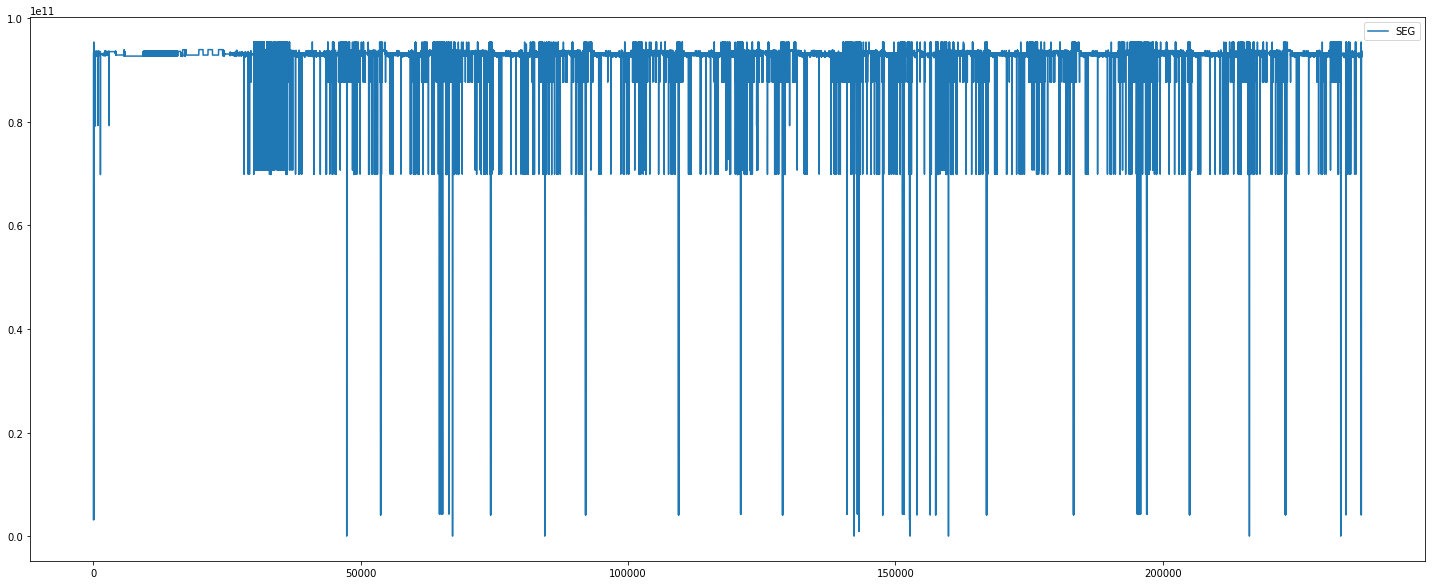

In [112]:
original.plot(figsize=(25, 10))

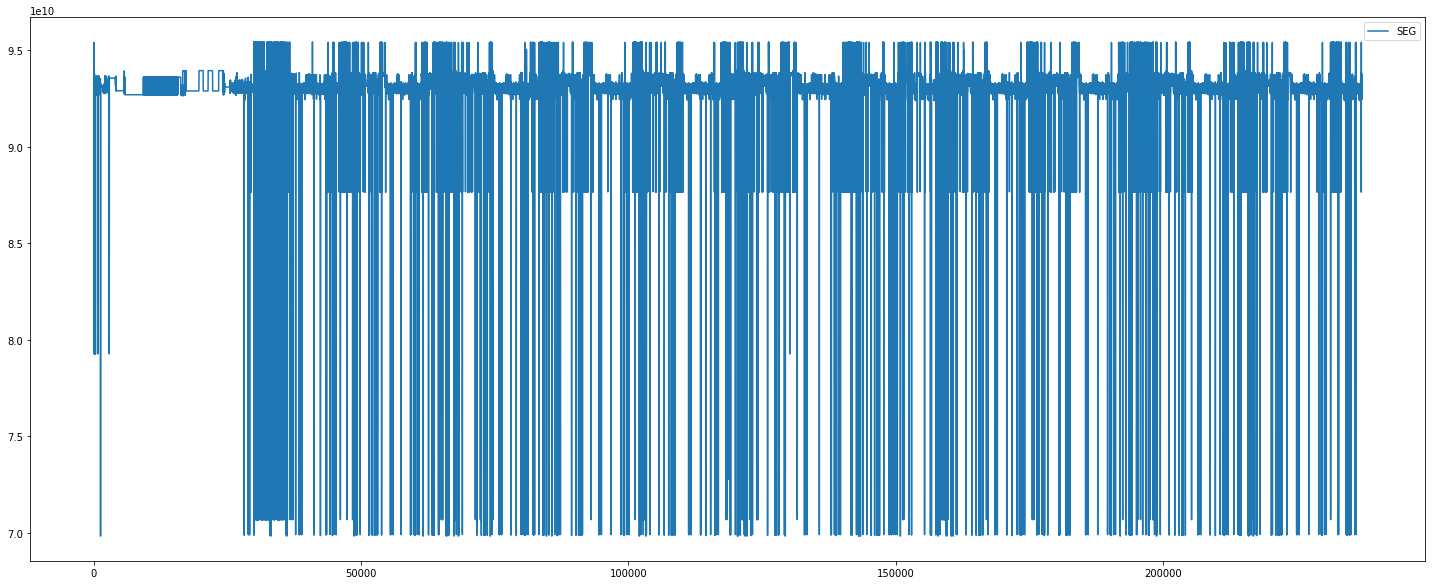

In [114]:
data = original.copy()

value_range = [(data["SEG"].max() - data["SEG"].min()) / 10 *i for i in range(10)]
docile = (data["SEG"] <= value_range[1])     # Only Remove 1st chunk of deciles
docile_index = docile.index[docile == True]

data = data.drop(index=docile_index)
data.plot(figsize=(25, 10))

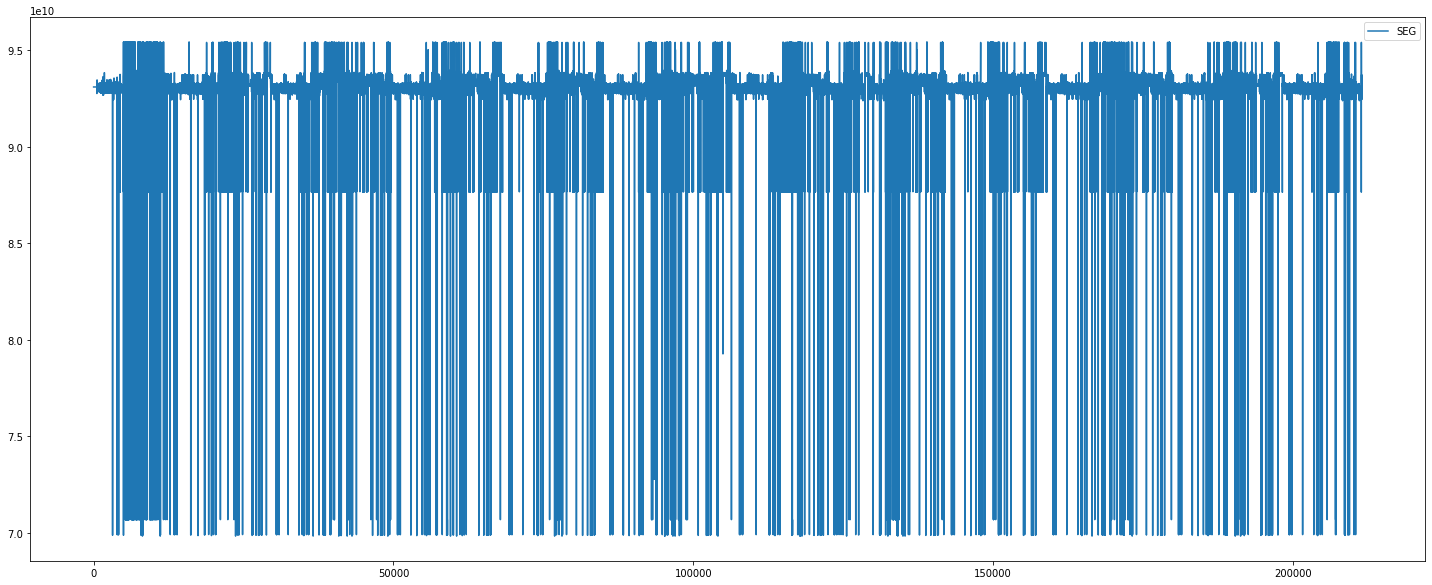

In [115]:
data = data[25000:].reset_index(drop=True)
data.plot(figsize=(25, 10))

In [116]:
split_index = 190000
train_set = data[:split_index]
test_set = data[split_index:]
test_set.reset_index(drop=True, inplace=True)
train_set, test_set

(                SEG
 0       93108860032
 1       93108860032
 2       93108860032
 3       93108860032
 4       93108860032
 ...             ...
 189995  93845441848
 189996  93724397616
 189997  93762141216
 189998  93810533696
 189999  93724405502
 
 [190000 rows x 1 columns],
                SEG
 0      93845980008
 1      87645661824
 2      93546205352
 3      93690884480
 4      93724389424
 ...            ...
 21496  92622695528
 21497  92622695520
 21498  92658792872
 21499  92658792864
 21500  92654987192
 
 [21501 rows x 1 columns])

In [117]:
data_counts = train_set["SEG"].value_counts()
data_counts.head(25)

93108860032    548
93163522156    383
93236457720    138
93251216640    135
93244559952    103
93223851888     63
93240795152     62
93250759024     62
93267603520     35
93258540232     35
93265735832     34
93267609664     34
93285544136     34
93267612736     33
93267593280     33
93265667136     33
93267600536     33
93267597464     33
93267587136     32
93267615808     31
93267584064     31
92963307520     30
92963315712     29
92963311616     29
92959839760     27
Name: SEG, dtype: int64

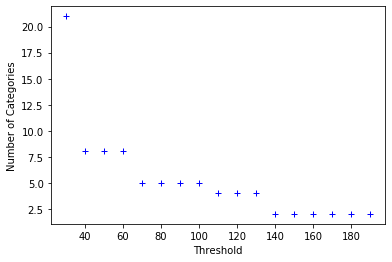

In [118]:
data_over_threshold_incremental = pd.DataFrame(data=[(data_counts > i*10).value_counts().values for i in range(3, 20)], columns=["Under Threshold", "Over Threshold"])
plt.plot([i*10 for i in range(3, 20)], data_over_threshold_incremental["Over Threshold"], "b+")
plt.xlabel("Threshold")
plt.ylabel("Number of Categories")
plt.show()

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)